In [0]:
!wget http://cb.lk/covid_19

In [0]:
!unzip covid_19

In [0]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [0]:
# CNN Based Model in Keras

In [0]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

In [0]:
#Train from scratch


train_datagen = image.ImageDataGenerator(
    
    rescale= 1./255,
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)


In [0]:
test_datagen = image.ImageDataGenerator(
    
    rescale =1./255
)

In [59]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size =(224,224),
    batch_size=32,
    class_mode ='binary'
)

Found 224 images belonging to 2 classes.


In [60]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [61]:
validation_generator = test_datagen.flow_from_directory(
    
    'CovidDataset/Val',
    target_size =(224,224),
    batch_size=32,
    class_mode ='binary'

)

Found 60 images belonging to 2 classes.


In [62]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs =10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 9s 1s/step - loss: 0.7983 - accuracy: 0.5586 - val_loss: 0.6919 - val_accuracy: 0.6167
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.6626 - accuracy: 0.6289 - val_loss: 0.6356 - val_accuracy: 0.8667
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.5579 - accuracy: 0.6836 - val_loss: 0.4418 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 0.3055 - accuracy: 0.8633 - val_loss: 0.1961 - val_accuracy: 0.9333
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.2423 - accuracy: 0.9141 - val_loss: 0.1239 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.1708 - accuracy: 0.9180 - val_loss: 0.0226 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.2275 - accuracy: 0.9180 - val_loss: 0.0619 - val_accuracy: 0.9833
Epoch 8/10
8/8 [=========================

In [0]:
# class activation map
# Grad-CAM

In [0]:
model.save("model_adv.h5")

# LOSS is very less

In [65]:
model.evaluate_generator(train_generator)

[0.12216537445783615, 0.96875]

In [66]:
model.evaluate_generator(validation_generator)

[0.1075497642159462, 0.9666666388511658]

# Test images

In [0]:
model =load_model('model_adv.h5')

In [0]:
import os

In [69]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
y_actual = []
y_test = []

In [0]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img =image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img= image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [0]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img =image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img= image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [0]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_actual,y_test)


In [0]:
import seaborn as sns

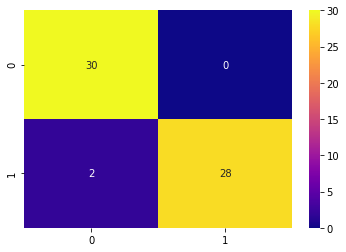

In [77]:
sns.heatmap(cm,cmap="plasma",annot = True)